In [13]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
source = requests.get("https://vi.wikipedia.org/wiki/Danh_s%C3%A1ch_nh%E1%BB%AFng_k%C3%AAnh_%C4%91%C6%B0%E1%BB%A3c_%C4%91%C4%83ng_k%C3%BD_nhi%E1%BB%81u_nh%E1%BA%A5t_YouTube")
source.raise_for_status()
soup = BeautifulSoup(source.text,'html.parser')


In [3]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="vi">
<head>
<meta charset="utf-8"/>
<title>Danh sách những kênh được đăng ký nhiều nhất YouTube – Wikipedia tiếng Việt</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enable

In [4]:
divv = soup.find('div',class_ = "mw-parser-output")
table = divv.find('table')
body = table.find('tbody').find_all('tr')

In [5]:
print(body[1])

<tr>
<td style="text-align:center">1
</td>
<td><a class="mw-redirect" href="/wiki/T-Series_(company)" title="T-Series (company)">T-Series</a>
</td>
<td><span class="plainlinks"><a class="external text" href="https://www.youtube.com/channel/UCq-Fj5jknLsUf-MWSy4_brA" rel="nofollow">Link</a></span>
</td>
<td class="table-yes" style="background: #90ff90; color: black; vertical-align: middle; text-align: center;"><span typeof="mw:File"><span><img alt="Yes" data-file-height="600" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/03/Green_check.svg/13px-Green_check.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/03/Green_check.svg/20px-Green_check.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/03/Green_check.svg/26px-Green_check.svg.png 2x" width="13"/></span></span>
</td>
<td style="text-align:center">234
</td>
<td><a href="/wiki/Ti%E1%BA%BFng_Hindi" title="Tiếng Hindi">Tiếng Hindi</a><sup class="referen

In [6]:
print(body[5])

<tr>
<td style="text-align:center">5
</td>
<td><a href="/wiki/PewDiePie" title="PewDiePie">PewDiePie</a>
</td>
<td><span class="plainlinks"><a class="external text" href="https://youtube.com/user/PewDiePie" rel="nofollow">Link</a></span>
</td>
<td class="table-na" data-sort-value="" style="vertical-align:middle; text-align:center">—
</td>
<td style="text-align:center">111
</td>
<td><a href="/wiki/Ti%E1%BA%BFng_Anh" title="Tiếng Anh">Tiếng Anh</a>
</td>
<td>Trò chơi
</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" data-file-height="320" data-file-width="512" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Sweden.svg/23px-Flag_of_Sweden.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Sweden.svg/35px-Flag_of_Sweden.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Sweden.svg/46px-Flag_of_Sweden.svg.png 2x" width="23"/></span></span> </span><a 

In [7]:
Data = pd.DataFrame(columns =["Name Channel","Brand channel","Subcribers","National","Categori"])

In [10]:

for channel in body[1:51]:
    td = channel.find_all('td')
    name = td[1].text
    Brand_channel = channel.find_all('td')[3].attrs.get('class')[0] 
    sub = td[4].text
    nation = td[7].text
    categori=td[6].text
    new_row = {
        "Name Channel": name.strip(),
        "Brand channel": Brand_channel=="table-yes",
        "Subcribers" : sub.strip(),
        "National" : nation.strip(),
        "Categori" : categori.strip()
    }
    Data = Data.append(new_row,ignore_index=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_23916\3542365370.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data = Data.append(new_row,ignore_index=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_23916\3542365370.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data = Data.append(new_row,ignore_index=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_23916\3542365370.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Data = Data.append(new_row,ignore_index=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_23916\3542365370.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data = Data.ap

In [11]:
Data

,Name Channel,Brand channel,Subcribers,National,Categori
0,T-Series,True,234,Ấn Độ,Âm nhạc
1,Cocomelon - Nursery Rhymes,True,147,Hoa Kỳ,Giáo dục
2,SET India,True,146,Ấn Độ,Giải trí
3,MrBeast,True,122,Hoa Kỳ,Giải trí
4,PewDiePie,False,111,Thụy Điển,Trò chơi
5,Kids Diana Show,True,106,Ukraine,Phim
6,Like Nastya,False,104,Nga,Giải trí
7,WWE,True,91.9,Hoa Kỳ,Thể thao
8,Zee Music Company,True,89.9,Ấn Độ,Âm nhạc
9,Vlad and Niki,False,89.6,Nga,Giải trí


#### Thể loại kênh youtube như nào đang được ưa chuộng

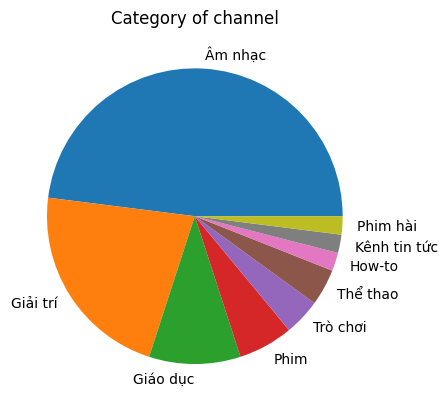

In [14]:
unique_values = np.unique(Data['Categori'])
counts = Data['Categori'].value_counts()
plt.title("Category of channel")
plt.pie(counts, labels=counts.index)
plt.show()

Có thể thấy âm nhạc và giải trí còn chiếm phần lớn ~ 70% 

#### Số lượng người subs theo từng thể loại 

In [15]:
temp = []
for i in unique_values:
    temp.append(Data[Data['Categori'] == i]["Subcribers"].astype(float).sum())

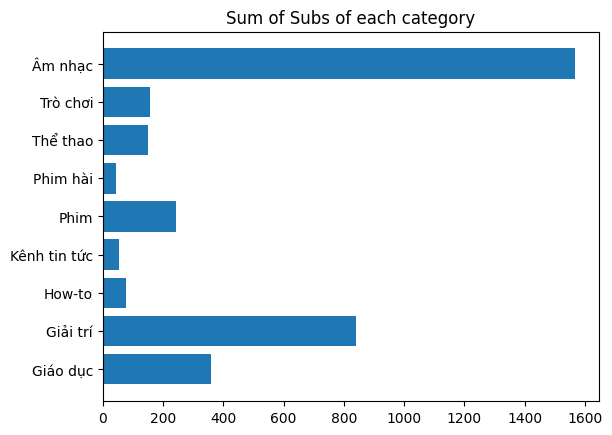

In [16]:
plt.barh(unique_values,temp)
plt.title("Sum of Subs of each category")
plt.show()

#### Danh sách các nước phát triển youtube 

In [17]:
num_nation = np.unique(Data['National'])
len(num_nation),num_nation

(16,
 array(['Argentina', 'Brasil', 'Brazil', 'Canada', 'Chile', 'El Salvador',
        'Hoa Kỳ', 'Hàn Quốc', 'México', 'Nga', 'Puerto Rico', 'Síp',
        'Thụy Điển', 'Ukraine', 'Vương quốc Anh', 'Ấn Độ'], dtype=object))

<BarContainer object of 16 artists>

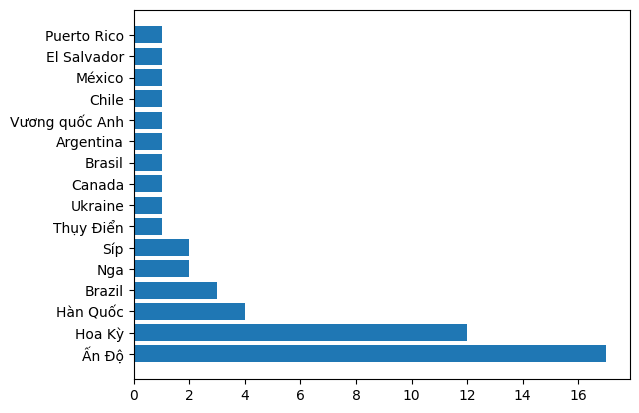

In [18]:
fre = Data['National'].value_counts()
plt.barh(fre.index,fre)

Các kênh của Ấn độ có vẻ ăn khách ..vậy ấn độ thường làm về content gì ?

In [19]:
india = Data[Data['National'] == "Ấn Độ"]["Categori"].value_counts()

In [20]:
india

Âm nhạc         9
Giải trí        4
Giáo dục        2
Phim            1
Kênh tin tức    1
Name: Categori, dtype: int64

Text(0.5, 1.0, 'India')

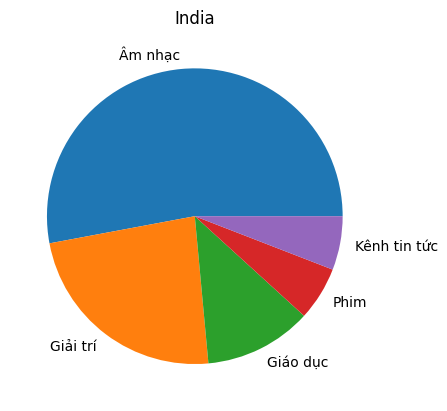

In [21]:
plt.pie(india,labels = india.index)
plt.title("India")

Tất cả thì sao

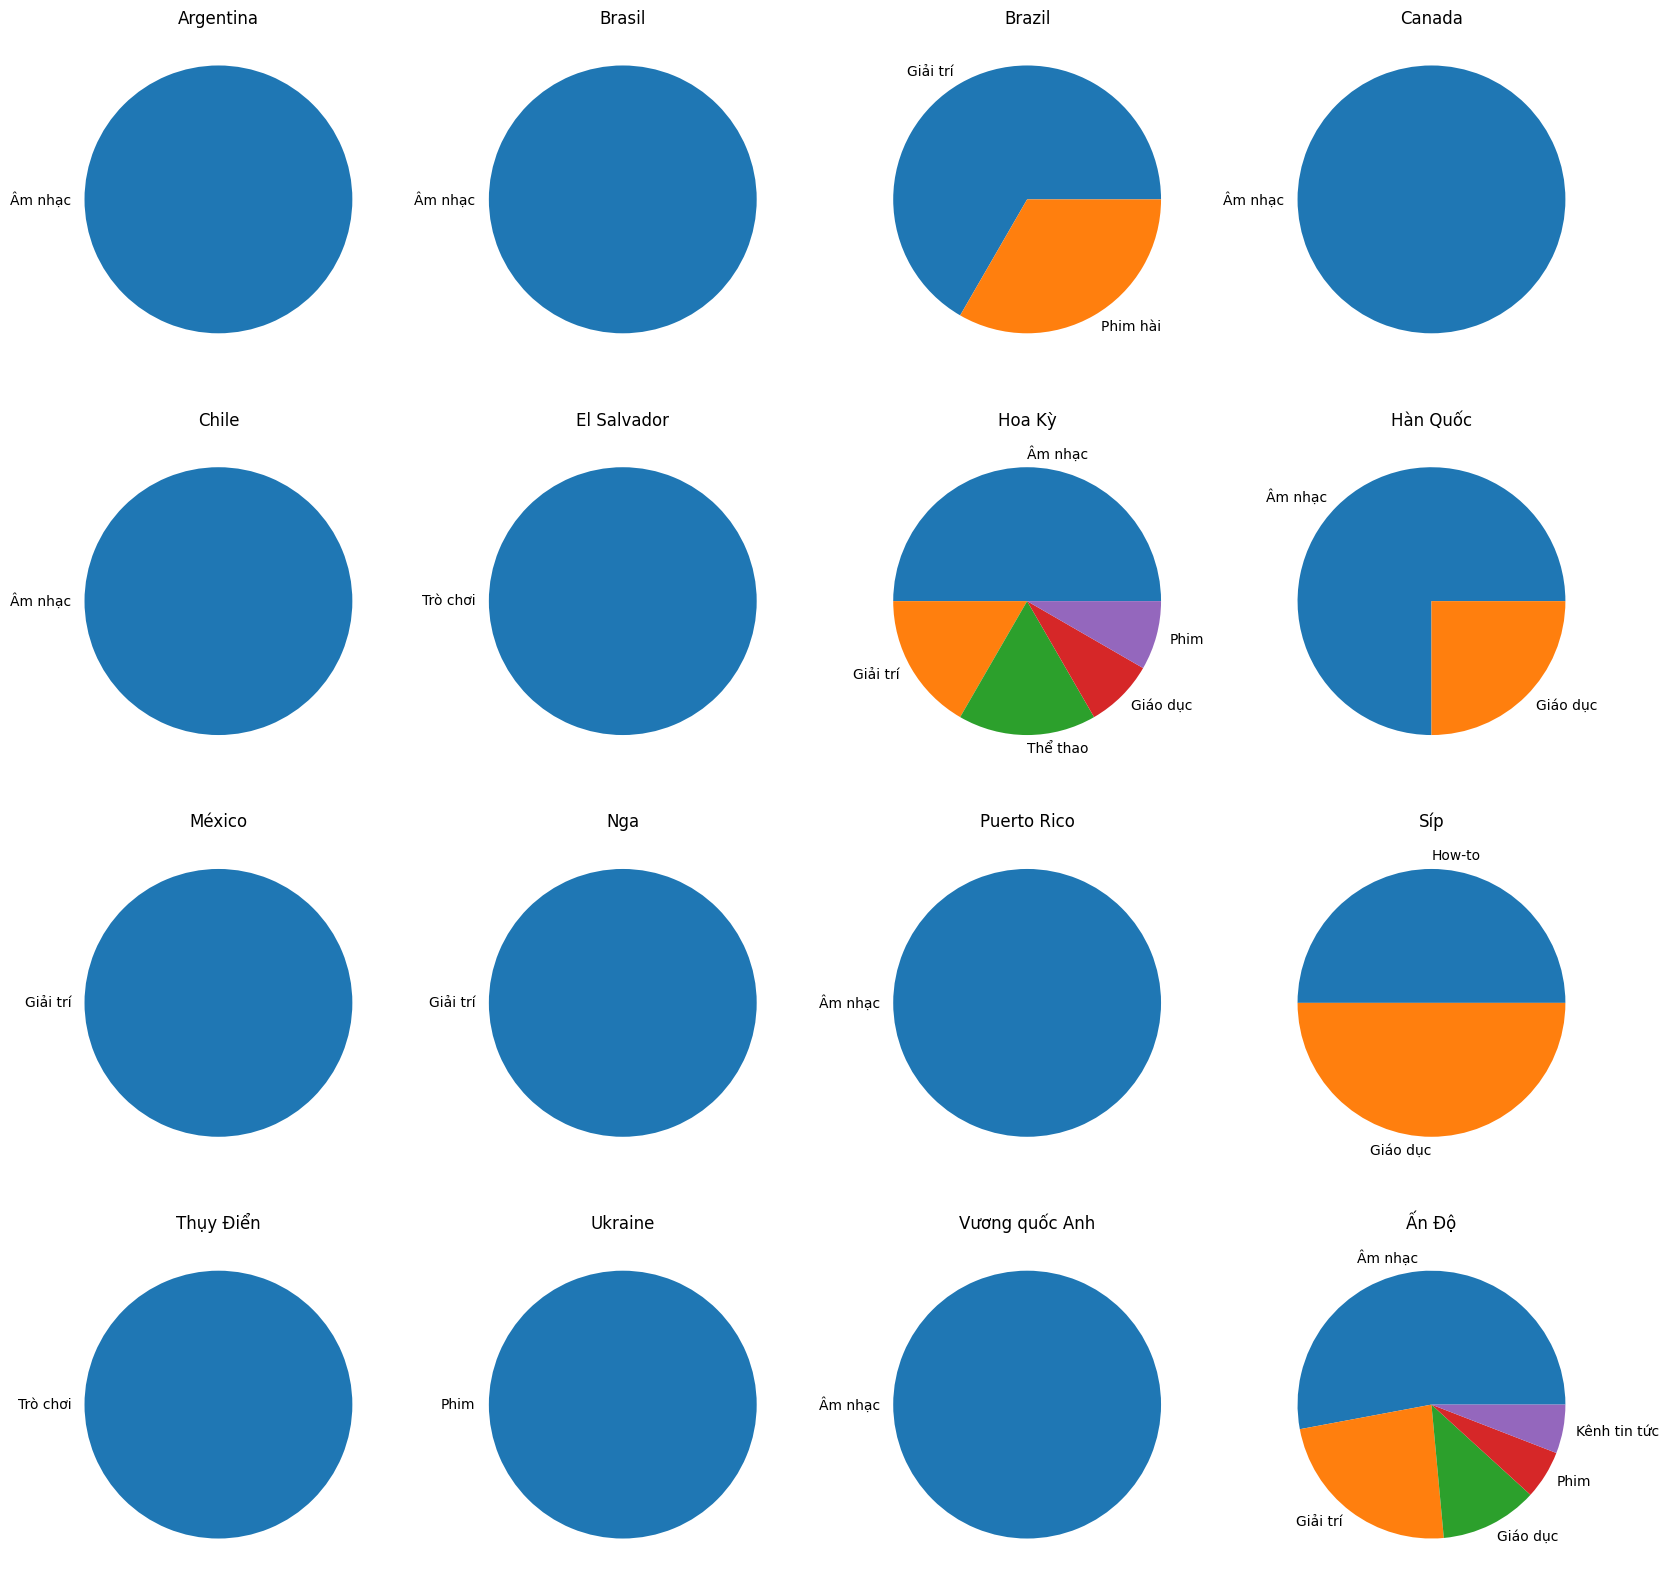

In [22]:
fig = plt.figure(figsize=(20,20))
a = 0
for i in num_nation:
    plt.subplot(4,4,a+1)
    plt.axis(False)
    nation = Data[Data['National'] == i]["Categori"].value_counts()
    plt.pie(nation,labels = nation.index)
    plt.title(i)
    a +=1

có vẻ Ấn độ khá đa dạng

Thử xem trong 50 kênh top đầu này có bn kênh là brand channel ví dụ trong lĩnh vực âm nhạc

In [32]:
Data[Data['Categori'] == "Âm nhạc"]['Brand channel'].value_counts()

True     13
False    11
Name: Brand channel, dtype: int64

Số người đăng kí của các kênh brand so với ko brand

In [47]:
Data[(Data['Categori'] == "Âm nhạc") & (Data['Brand channel'] == True)]["Subcribers"].astype(float).sum()

939.4

In [48]:
Data[(Data['Categori'] == "Âm nhạc") & (Data['Brand channel'] == False)]["Subcribers"].astype(float).sum()

628.9

Từng quốc gia có bao nhiêu brand channel

<Axes: xlabel='National'>

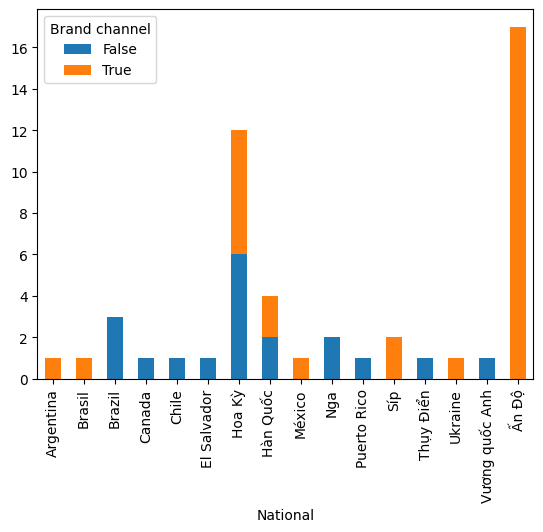

In [53]:
Data.groupby('National')['Brand channel'].value_counts().unstack().plot(kind='bar', stacked=True)


Ấn độ thì toàn brand còn mỹ  thì nửa nọ nửa kia